<a href="https://colab.research.google.com/github/nike-2001/ML-Workshop/blob/main/Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv("cleaned_76hd.csv")
df.head()

,V1,V3,V4,V8,V9,V10,V11,V12,V13,V14,...,V42,V43,V44,V50,V51,V54,V55,V56,V57,V58
0,0.000000,0.708333,1.0,0.0,0.000000,0.723618,0.003953,0.244292,0.0,0.505051,...,0.0,0.637037,0.000000,1.0,0.75,0.0,0.035714,0.185185,0.97619,0.0
1,0.003367,0.791667,1.0,0.0,0.023256,0.798995,0.003953,0.365297,0.0,0.404040,...,0.0,0.685185,1.000000,1.0,0.00,0.0,0.035714,0.049383,0.97619,1.0
2,0.006734,0.791667,1.0,0.0,0.023256,0.597990,0.003953,0.235160,0.0,0.202020,...,0.0,0.555556,0.666667,1.0,1.00,0.0,0.035714,0.234568,0.97619,1.0
3,0.010101,0.166667,1.0,0.0,0.015504,0.648241,0.000000,0.283105,0.0,0.000000,...,0.0,0.618519,0.000000,1.0,0.00,0.0,0.035714,0.037037,0.97619,0.0
4,0.016835,0.250000,0.0,0.0,0.007752,0.648241,0.003953,0.178082,0.0,0.000000,...,0.0,0.148148,0.000000,1.0,0.00,0.0,0.035714,0.209877,0.97619,0.0


In [ ]:
df.corr()

,V1,V3,V4,V8,V9,V10,V11,V12,V13,V14,...,V42,V43,V44,V50,V51,V54,V55,V56,V57,V58
V1,1.000000,-0.010083,-0.093859,-0.063001,-0.077641,0.015701,-0.080009,-0.017834,-0.065309,-0.167396,...,-0.084147,-0.015049,0.047982,0.035679,-0.076337,-0.102214,0.029645,-0.046618,0.167018,-0.023810
V3,-0.010083,1.000000,-0.091125,0.036892,0.024249,0.208996,0.029618,0.210434,0.062247,-0.126901,...,-0.008327,0.070107,0.350576,0.068727,0.090986,0.041937,-0.085886,-0.053511,-0.022282,0.204405
V4,-0.093859,-0.091125,1.000000,0.041177,0.008215,-0.050778,0.023165,-0.200173,0.057196,0.323899,...,-0.019368,0.069551,0.079915,0.086426,0.377250,0.050891,-0.020349,0.055655,-0.023690,0.309349
V8,-0.063001,0.036892,0.041177,1.000000,0.606848,-0.347700,0.681665,-0.052773,0.552648,0.071758,...,-0.006099,-0.148042,-0.041687,0.003559,-0.050302,0.743810,-0.022760,0.029773,-0.491480,0.065434
V9,-0.077641,0.024249,0.008215,0.606848,1.000000,-0.604720,0.986245,-0.083575,0.842932,0.031397,...,0.644348,-0.258224,-0.055908,-0.500525,-0.067737,0.493118,0.208776,0.442083,-0.857524,0.144038
V10,0.015701,0.208996,-0.050778,-0.347700,-0.604720,1.000000,-0.590895,0.173419,-0.482967,-0.033284,...,-0.406053,0.270446,0.105767,0.347700,0.148721,-0.279942,-0.205701,-0.318544,0.515472,0.039983
V11,-0.080009,0.029618,0.023165,0.681665,0.986245,-0.590895,1.000000,-0.088129,0.896897,0.037530,...,0.562585,-0.252237,-0.070452,-0.376495,-0.083654,0.536771,0.195324,0.404309,-0.838297,0.112136
V12,-0.017834,0.210434,-0.200173,-0.052773,-0.083575,0.173419,-0.088129,1.000000,-0.073303,-0.108847,...,-0.071932,0.057706,0.137958,0.052773,0.051446,-0.055466,-0.017969,-0.063617,0.082458,0.099745
V13,-0.065309,0.062247,0.057196,0.552648,0.842932,-0.482967,0.896897,-0.073303,1.000000,0.048437,...,0.394884,-0.203584,-0.057905,0.004943,-0.069872,0.408843,0.197803,0.333307,-0.687778,0.090890
V14,-0.167396,-0.126901,0.323899,0.071758,0.031397,-0.033284,0.037530,-0.108847,0.048437,1.000000,...,-0.025716,0.002383,0.009814,0.051200,0.188178,0.056139,-0.054967,-0.099137,-0.029951,0.085525


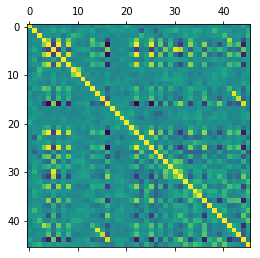

,V1,V3,V4,V8,V9,V10,V11,V12,V13,V14,...,V42,V43,V44,V50,V51,V54,V55,V56,V57,V58
V1,1.000000,-0.010083,-0.093859,-0.063001,-0.077641,0.015701,-0.080009,-0.017834,-0.065309,-0.167396,...,-0.084147,-0.015049,0.047982,0.035679,-0.076337,-0.102214,0.029645,-0.046618,0.167018,-0.023810
V3,-0.010083,1.000000,-0.091125,0.036892,0.024249,0.208996,0.029618,0.210434,0.062247,-0.126901,...,-0.008327,0.070107,0.350576,0.068727,0.090986,0.041937,-0.085886,-0.053511,-0.022282,0.204405
V4,-0.093859,-0.091125,1.000000,0.041177,0.008215,-0.050778,0.023165,-0.200173,0.057196,0.323899,...,-0.019368,0.069551,0.079915,0.086426,0.377250,0.050891,-0.020349,0.055655,-0.023690,0.309349
V8,-0.063001,0.036892,0.041177,1.000000,0.606848,-0.347700,0.681665,-0.052773,0.552648,0.071758,...,-0.006099,-0.148042,-0.041687,0.003559,-0.050302,0.743810,-0.022760,0.029773,-0.491480,0.065434
V9,-0.077641,0.024249,0.008215,0.606848,1.000000,-0.604720,0.986245,-0.083575,0.842932,0.031397,...,0.644348,-0.258224,-0.055908,-0.500525,-0.067737,0.493118,0.208776,0.442083,-0.857524,0.144038
V10,0.015701,0.208996,-0.050778,-0.347700,-0.604720,1.000000,-0.590895,0.173419,-0.482967,-0.033284,...,-0.406053,0.270446,0.105767,0.347700,0.148721,-0.279942,-0.205701,-0.318544,0.515472,0.039983
V11,-0.080009,0.029618,0.023165,0.681665,0.986245,-0.590895,1.000000,-0.088129,0.896897,0.037530,...,0.562585,-0.252237,-0.070452,-0.376495,-0.083654,0.536771,0.195324,0.404309,-0.838297,0.112136
V12,-0.017834,0.210434,-0.200173,-0.052773,-0.083575,0.173419,-0.088129,1.000000,-0.073303,-0.108847,...,-0.071932,0.057706,0.137958,0.052773,0.051446,-0.055466,-0.017969,-0.063617,0.082458,0.099745
V13,-0.065309,0.062247,0.057196,0.552648,0.842932,-0.482967,0.896897,-0.073303,1.000000,0.048437,...,0.394884,-0.203584,-0.057905,0.004943,-0.069872,0.408843,0.197803,0.333307,-0.687778,0.090890
V14,-0.167396,-0.126901,0.323899,0.071758,0.031397,-0.033284,0.037530,-0.108847,0.048437,1.000000,...,-0.025716,0.002383,0.009814,0.051200,0.188178,0.056139,-0.054967,-0.099137,-0.029951,0.085525


In [ ]:
import matplotlib.pyplot as plt

plt.matshow(df.corr())
plt.show()
df.corr()

In [ ]:
df.columns

Index(['V1', 'V3', 'V4', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
       'V16', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26',
       'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36',
       'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V50', 'V51',
       'V54', 'V55', 'V56', 'V57', 'V58'],
      dtype='object')

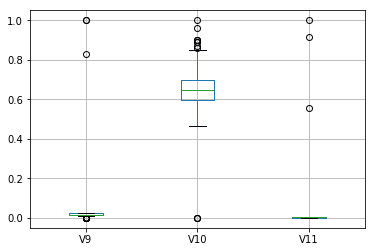

In [ ]:
df[['V9','V10','V11']].boxplot()

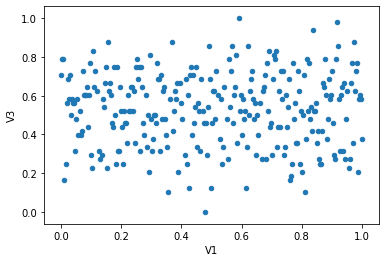

In [ ]:
df.plot.scatter(x='V1',y='V3')

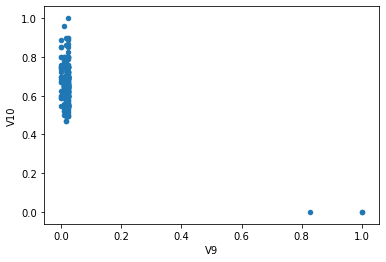

In [ ]:
df.plot.scatter(x='V9',y='V10')

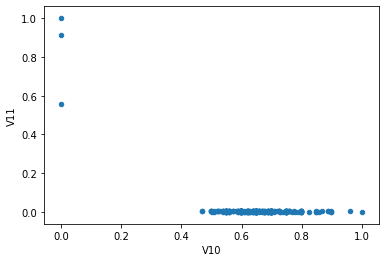

In [ ]:
df.plot.scatter(x='V10',y='V11')

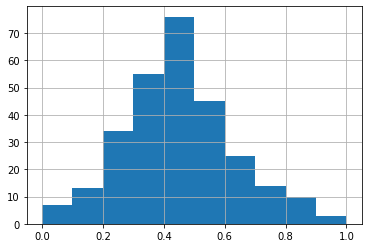

In [ ]:
df['V43'].hist()

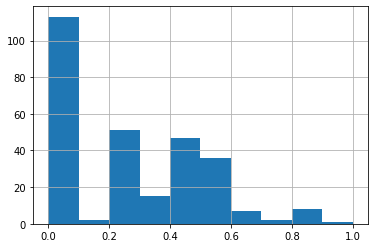

In [ ]:
df['V30'].hist()

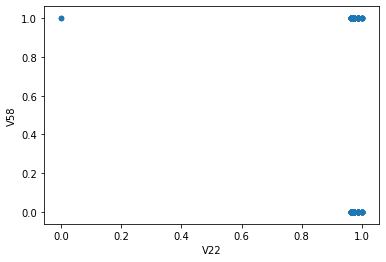

In [ ]:
df.plot.scatter(x='V22',y='V58')

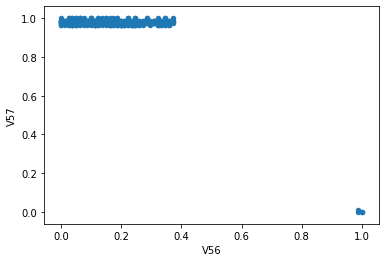

In [ ]:
df.plot.scatter(x='V56',y='V57')

In [ ]:
cor = df.corr()
#Correlation with output variable
cor_target = abs(cor["V58"])
print(cor_target)

V1     0.020331
V3     0.204405
V4     0.309349
V8     0.065434
V9     0.144038
V10    0.039983
V11    0.112136
V12    0.099745
V13    0.090890
V14    0.085525
V15    0.088660
V16    0.001277
V18    0.071976
V19    0.183453
V20    0.052685
V21    0.007952
V22    0.119330
V23    0.165533
V24    0.110801
V25    0.143824
V26    0.064526
V27    0.019151
V28    0.113564
V29    0.247064
V30    0.260546
V31    0.066130
V32    0.410762
V33    0.062453
V34    0.139876
V35    0.089957
V36    0.102718
V37    0.015849
V38    0.406703
V39    0.163591
V40    0.424634
V41    0.320719
V42    0.112146
V43    0.045519
V44    0.450304
V50    0.065434
V51    0.503341
V54    0.097688
V55    0.074246
V56    0.055929
V57    0.136242
V58    1.000000
Name: V58, dtype: float64


In [ ]:
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

V3     0.204405
V4     0.309349
V29    0.247064
V30    0.260546
V32    0.410762
V38    0.406703
V40    0.424634
V41    0.320719
V44    0.450304
V51    0.503341
V58    1.000000
Name: V58, dtype: float64

In [ ]:
# Separate Input features X and Class variable Y
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [ ]:
from sklearn.model_selection import train_test_split
# Split Training and Testing Data
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

In [ ]:
from sklearn.decomposition import PCA# Make an instance of the Model
pca = PCA(0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
print(X_train.shape)
X_train[:5]

(211, 17)


array([[-0.91184873, -0.43658927, -0.36941495,  0.15952218,  0.24530328,
        -0.01040643,  0.12953799, -0.05893467, -0.27944327, -0.07829479,
        -0.19947064,  0.03261453,  0.19804891, -0.35115451, -0.30068699,
        -0.1364811 ,  0.05320717],
       [-0.66445391,  0.59989483,  0.17661888, -0.26530568, -0.47961691,
        -0.46326875, -0.22454713,  0.50396494,  0.71572602,  0.22070996,
        -0.42905189,  0.35415783, -0.51141561, -0.18180993,  0.06714672,
        -0.46653934, -0.04777063],
       [ 0.3129931 , -0.08946357, -0.50541651, -0.34453506, -0.69124442,
         0.27137906,  0.64519965,  0.05759388,  0.14840563, -0.11027154,
        -0.06315888, -0.24551976,  0.1769058 , -0.09020612,  0.42232931,
         0.21406209,  0.65581947],
       [-0.908135  ,  0.12898887,  0.09441139,  0.6137171 , -0.0075155 ,
        -0.25427593, -0.03389854, -0.47727613, -0.12806946,  0.1284151 ,
         0.00750877, -0.14684435, -0.11512584,  0.30736427,  0.1716505 ,
        -0.22037643